In [1]:
import numpy as np 
import sys,pickle 
import matplotlib.pyplot as plt 
from tqdm.notebook import tqdm 

sys.path.append('../..')
from project.recoil import Electron as El, p50, norm, get_vdf_ert
from project.electron_pll import MLE
from project.electron_pll import StatisticalUncertanity as Stat 
from project.electron_pll import MassModelUncertanity as MassModel

import matplotlib
matplotlib.rcParams['font.family'] = 'sans'
matplotlib.rcParams['mathtext.fontset'] = 'dejavusans'

In [2]:
MWlike = pickle.load(open('../../Output/MWlike_dict.pkl','rb'))
mwld = MWlike['vdf_RCfit']
mwd = mwld['MW']
mwgals = MWlike['mwgals']

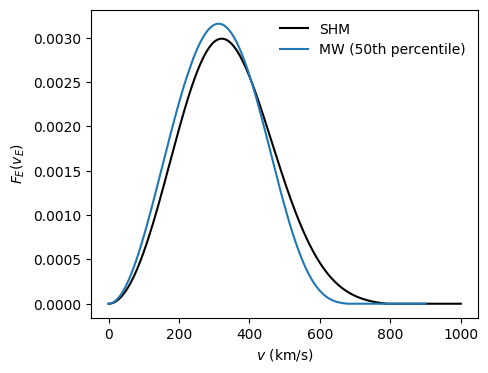

In [14]:
vgal = np.linspace(1e-5,1e3,1000)
fshm = np.exp(-(vgal/220)**2)
fshm[vgal>544.] = 0
fgal = vgal**2 * fshm
fgal = fgal/np.trapz(fgal,vgal)
vE= np.linspace(1e-5,1000,1000)
fE = get_vdf_ert(vE, vgal, fgal, 544., 220.)

fig,ax = plt.subplots(figsize=(5,4))
ax.plot(vE, fE, c='k', label='SHM')
ax.plot(mwd['vE'], mwd['vdfE_50'], label='MW (50th percentile)')
ax.legend(loc='upper right', frameon=False)

ax.set_xlabel('$v$ (km/s)')
ax.set_ylabel('$F_E(v_E)$');

In [3]:
el_init = El('Si', vE=mwd['vE'], vdfE=mwd['vdfE_50'], vesc=p50(mwd['vescs']), vcirc=p50(mwd['vcircs']), rhosun=0.4)
mdm0, sdm0, bl0 = 5., 1e-38, 1.
mock = el_init.mocksample(mdm0, sdm0, bl0, 3.8, exposure=1, seed=5222)
print (el_init.totNsg(mdm0, sdm0, exposure=1))

1088.0846326128096


In [8]:
Mdm = np.logspace(0,2,30)
Sdm_1 = el_init.sdmMdmNsg(Mdm, exposure=1, Ne_thr=3)
Sdm_10 = el_init.sdmMdmNsg(Mdm, exposure=10)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

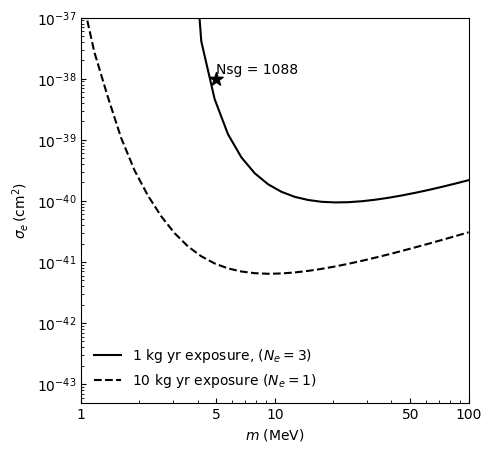

In [9]:
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(Mdm, Sdm_1, c='k', ls='-', label='1 kg yr exposure, ($N_e = 3$)')
ax.plot(Mdm, Sdm_10, ls='--', c='k', label='10 kg yr exposure ($N_e = 1$)')
ax.legend(loc='lower left', frameon=False)

ax.scatter(mdm0, sdm0, c='k', marker='*', s=100)
ax.text(mdm0, sdm0*1.2, 'Nsg = %i'%el_init.totNsg(mdm0, sdm0))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1,100)
ax.set_ylim(5e-44,1e-37)
ax.set_xticks([1, 5, 10, 50, 100], [1, 5, 10, 50, 100])
ax.tick_params(which='both', direction='in')
ax.set_xlabel('$m$ (MeV)')
ax.set_ylabel('$\sigma_e\, (\mathrm{cm^{2}})$');

In [16]:
stat = Stat(mock, el_init=el_init, Mdm=np.linspace(3, 7, 100))
statlim = stat.get_limits(stat.Mdm)

(5e-39, 3e-38)

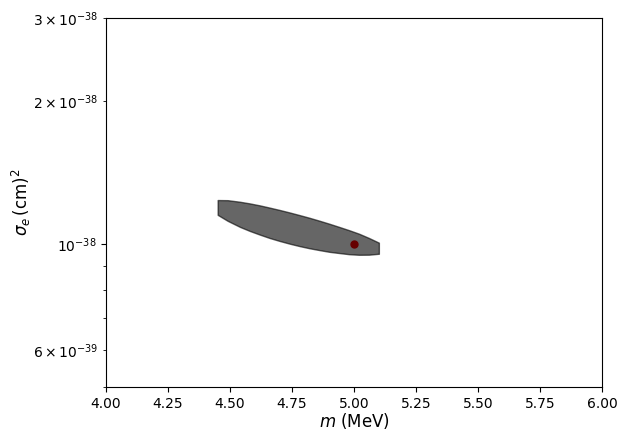

In [17]:
fig, ax = plt.subplots()
ax.scatter(mdm0, 1e-38, marker='.', s=100, c='r')
ax.fill_between(*statlim, color='k', alpha=0.6, label='statistical', zorder=2)
ax.set_yscale('log')
ax.set_xlabel('$m$ (MeV)', size=12, labelpad=0)
ax.set_ylabel('$\sigma_e\, \mathrm{(cm)^2}$', size=12, labelpad=0)
ax.set_xlim(4,6)
ax.set_ylim(5e-39,3e-38)

In [6]:
mm = MassModel(mock, el_init=el_init, Mdm=np.linspace(3, 7, 5))
mmlim = mm.get_limits(mm.Mdm)

  0%|          | 0/508 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [9]:
el = El('Si', mwd['vE'], mwd['vdfE_50'], vesc=p50(mwd['vescs']), vcirc=p50(mwd['vcircs']), rhosun=p50(mwd['rhosuns']))

In [10]:
mdm0, sdm0, bl0 = 5., 1e-38, 1.
bint = el.binTot(mdm0, sdm0, bl0)
bint_sg = el.binTot(mdm0, sdm0, 0.)

In [14]:
a1 = bint['Neachbin']
a2 = bint_sg['Neachbin'] 
a1 - a2

array([3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8])

In [24]:
mock = el_init.mocksample(mdm0, sdm0, bl0, 3.8, exposure=1, seed=5282)


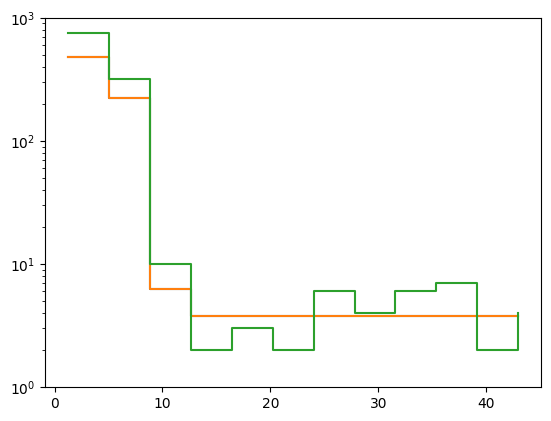

In [25]:
plt.step(el.bins[:-1], bint['Neachbin'], where='post')
plt.step(el.bins[:-1], bint_sg['Neachbin'] + mock['exposure']*3.8*bl0, where='post')
plt.step(el.bins[:-1], mock['binned_Esample'], where='post')
plt.ylim(1e0, 1e3)
plt.yscale('log')

In [ ]:
ne = 0
accuracy = int(np.floor(mock['binwidth']/el.ΔEe))
Ee_ = el.Egap + ne*mock['binwidth'] + el.ΔEe*np.arange(0, accuracy+1, 1)
print (Ee_)


[1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9
 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7
 4.8 4.9]
